In [1]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import json

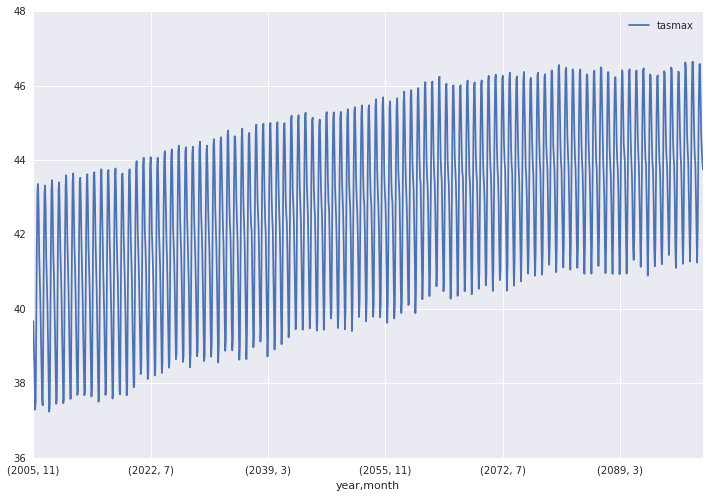

In [4]:
ax = pd.read_csv("data/tasmax_rcp45.csv",
                 names=["year", "month", "tasmax"], 
                 dtype={"year": np.int32, 
                        "month": np.int32,
                        "tasmax": np.float64})\
.sort_values(["year", "month"])\
.set_index(["year", "month"])\
.apply(lambda x: x * (9/5.) - 459.67)\
.plot(figsize=(12., 8.))

In [6]:
r = requests.get("http://172.31.5.210:18080/api/v1/applications/app-20151228143437-0031/stages/0")
log = r.json()[0]

with open("data/tasmax_rcp45_stage_0_log.json", "w") as fh:
    fh.write(json.dumps(log))

log.keys()

[u'shuffleReadBytes',
 u'tasks',
 u'executorSummary',
 u'attemptId',
 u'inputRecords',
 u'shuffleWriteBytes',
 u'details',
 u'diskBytesSpilled',
 u'outputRecords',
 u'executorRunTime',
 u'status',
 u'shuffleReadRecords',
 u'schedulingPool',
 u'memoryBytesSpilled',
 u'accumulatorUpdates',
 u'numActiveTasks',
 u'numCompleteTasks',
 u'outputBytes',
 u'numFailedTasks',
 u'name',
 u'inputBytes',
 u'shuffleWriteRecords',
 u'stageId']

In [16]:
r = requests.get("http://172.31.5.210:18080/api/v1/applications/app-20151228143437-0031/stages/1")
stage1 = r.json()[0]

with open("data/tasmax_rcp45_stage_1_log.json", "w") as fh:
    fh.write(json.dumps(stage1))

In [8]:
columns = ['executorId', 
           'attempt',
           'taskId',
           'launchTime',
           'executorDeserializeTime',
           'executorRunTime',
           'bytesRead',
           'recordsRead',
           'jvmGcTime',
           'memoryBytesSpilled',
           'resultSerializationTime',
           'resultSize',
           'bytesWritten',
           'recordsWritten',
           'writeTime']

def parse_task(t):
    return (t['executorId'], 
            t['attempt'],
            t['taskId'],
            t['launchTime'], 
            t['taskMetrics']['executorDeserializeTime'],
            t['taskMetrics']['executorRunTime'],
            t['taskMetrics']['inputMetrics']['bytesRead'],
            t['taskMetrics']['inputMetrics']['recordsRead'],
            t['taskMetrics']['jvmGcTime'],
            t['taskMetrics']['memoryBytesSpilled'],
            t['taskMetrics']['resultSerializationTime'],
            t['taskMetrics']['resultSize'],
            t['taskMetrics']['shuffleWriteMetrics']['bytesWritten'],
            t['taskMetrics']['shuffleWriteMetrics']['recordsWritten'],
            t['taskMetrics']['shuffleWriteMetrics']['writeTime'])
            
stage0 = pd.DataFrame([parse_task(t) for k,t in log['tasks'].items()], columns=columns)

In [9]:
stage0['attempt'].value_counts()

0    9305
Name: attempt, dtype: int64

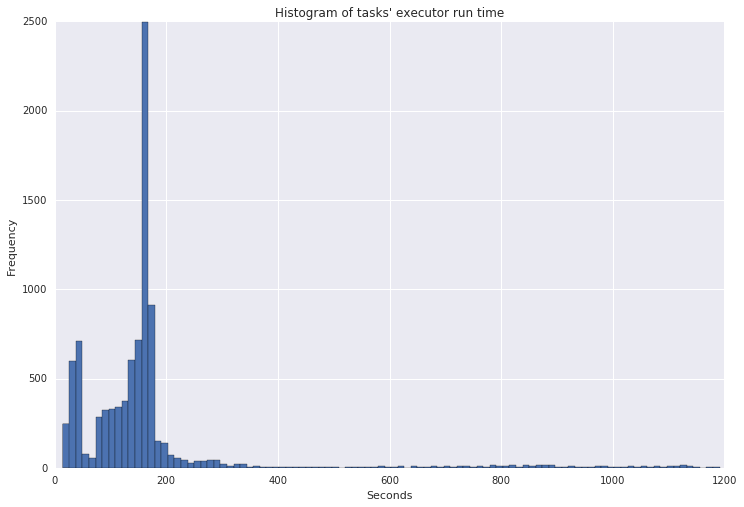

In [10]:
title = "Histogram of tasks' executor run time"
ax = stage0['executorRunTime'].apply(lambda x: x / 1000.).plot(kind="hist", bins=100, figsize=(12., 8.), title=title)
ax.set_xlabel("Seconds")

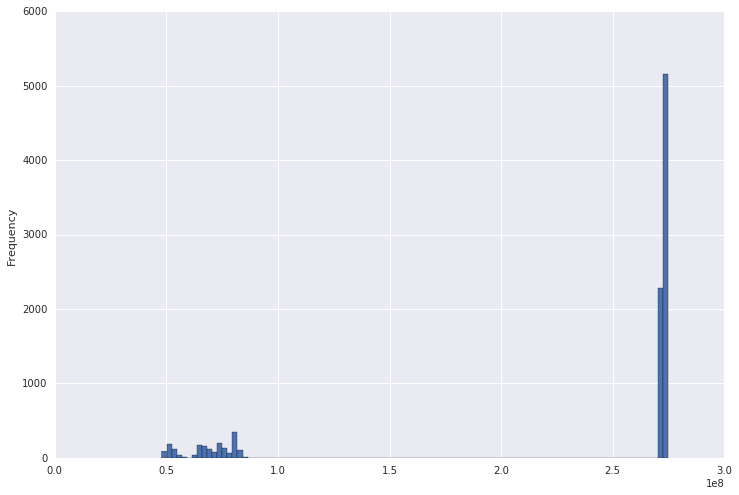

In [12]:
stage0['bytesRead'].plot(kind="hist", bins=100, figsize=(12., 8.))

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


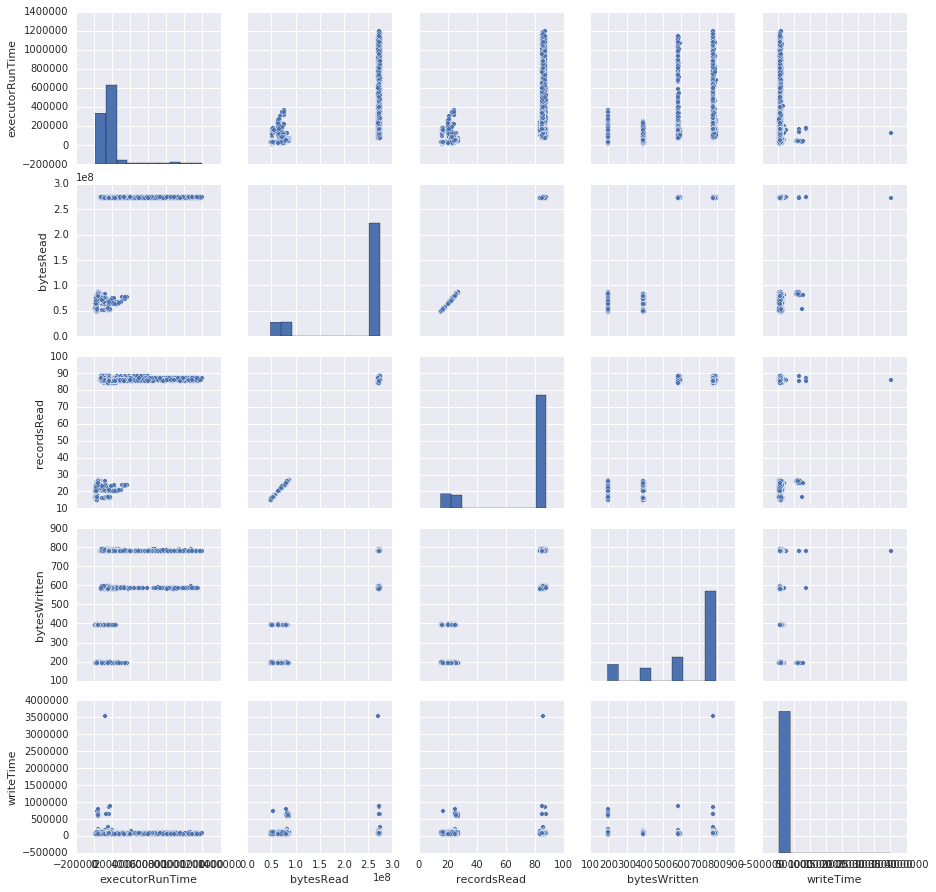

In [13]:
sns.pairplot(stage0[['executorRunTime', 'bytesRead', 'recordsRead', 'bytesWritten', 'writeTime']])

In [14]:
stage0.sort_values("writeTime", ascending=False)

,executorId,attempt,taskId,launchTime,executorDeserializeTime,executorRunTime,bytesRead,recordsRead,jvmGcTime,memoryBytesSpilled,resultSerializationTime,resultSize,bytesWritten,recordsWritten,writeTime
8713,14,0,2917,2015-12-28T15:37:47.757GMT,4,122132,271889886,86,124,0,0,10554,778,4,3526948
3537,11,0,5267,2015-12-28T16:21:53.151GMT,2,175036,273388447,85,288,0,0,10554,585,3,878679
7,3,0,5987,2015-12-28T16:35:04.248GMT,2,167358,273496177,87,416,0,0,10553,780,4,857924
8892,1,0,84,2015-12-28T14:34:41.777GMT,1589,41964,80628030,25,171,0,2,10553,195,1,779639
5478,11,0,5399,2015-12-28T16:24:21.503GMT,3,31743,52788567,17,49,0,0,10554,195,1,745163
7359,2,0,54,2015-12-28T14:34:41.759GMT,929,43400,83811370,26,221,0,2,10549,195,1,680403
8885,15,0,89,2015-12-28T14:34:41.780GMT,1395,40386,81381612,25,177,0,2,10554,195,1,673436
4270,7,0,124,2015-12-28T14:34:41.800GMT,1309,45262,83614471,26,203,0,2,10553,195,1,661209
8778,10,0,6612,2015-12-28T16:46:31.701GMT,3,134128,272719451,85,331,0,0,10554,778,4,660374
4603,11,0,109,2015-12-28T14:34:41.791GMT,1103,42465,81974855,26,146,0,2,10554,195,1,655581


In [15]:
stage0.to_csv("data/tasmax_rcp45_tasks.csv", index=False)